Importación de librerías

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose

1. ¿Qué pruebas identificarías para asegurar la calidad de estos datos? No es necesario
hacerlas, sólo describe la prueba y lo que te dice cada una.

Cosas que podemos hacer para observar la calidad de los datos puede ser:

Histogramas y boxplot para poder saber la distribución de los datos y te permiten ver si hay valores fuera de lo habitual, los llamados outliers.

Se podria utilizar metodo duplicated() de pandas para poder saber si tenemos filas duplicadas en los datos.

Podemos conseguir los na por columna con el isna() de pandas o tambien pudieramos 
utilizar info() para poder saber lo tipos de datos de las variables y los valores faltantes.

Por ejemplo si tenemos una fecha en string o object pudieramos tomar medidas para EN ese caso y pasarla a fecha.

Tambien puede ocurrir que una variables numerica este como object porque tenga algún string como '$' por ejemplo, lo cual pudieramos arreglar con un replace().

Además, podriamos hacer un describe() para ver uin resemun de varios estadistiacos de nuestras variables para poder entender mejor el rango de datos que tenemos, su variación y sospechar de que alguna columna pueda tener valores fuera de lo habitual.


2. Identifica los delitos que van a la alza y a la baja en la CDMX (ten cuidado con los delitos
con pocas ocurrencias).

In [2]:
#Carga de datos
df=pd.read_csv('carpetas_completa_febrero_2022.csv')
df.head()

C:\Users\kvgl3\AppData\Local\Temp\ipykernel_12100\2972293429.py:2: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('carpetas_completa_febrero_2022.csv')


,ao_hechos,mes_hechos,fecha_hechos,ao_inicio,mes_inicio,fecha_inicio,delito,fiscalia,agencia,unidad_investigacion,categoria_delito,calle_hechos,calle_hechos2,colonia_hechos,alcaldia_hechos,competencia,longitud,latitud,tempo
0,2016.0,Enero,2016-01-31 22:16:00,2016,Febrero,2016-02-01 00:25:44,DAÑO EN PROPIEDAD AJENA INTENCIONAL,INVESTIGACIÓN EN BENITO JUÁREZ,BJ-2,UI-3CD,DELITO DE BAJO IMPACTO,CALZ. DE TLALPAN,LAGO PTE.,AMÉRICAS UNIDAS,BENITO JUAREZ,NaN,-99.140215,19.380315,NaN
1,2016.0,Enero,2016-01-31 20:50:00,2016,Febrero,2016-02-01 00:52:37,ROBO DE VEHICULO DE SERVICIO PARTICULAR CON VI...,INVESTIGACIÓN PARA LA ATENCIÓN DEL DELITO DE R...,ORIENTEII,UI-3CD,ROBO DE VEHÍCULO CON Y SIN VIOLENCIA,SUR 25 A,GRANJEROS,LOS CIPRESES,IZTAPALAPA,NaN,-99.108403,19.352859,NaN
2,2016.0,Febrero,2016-02-01 00:30:00,2016,Febrero,2016-02-01 01:33:26,NARCOMENUDEO POSESION SIMPLE,"INVESTIGACIÓN PARA LA ATENCIÓN DE NIÑOS, NIÑAS...",57,UI-3CD,DELITO DE BAJO IMPACTO,BATALLONES ROJOS,NaN,UNIDAD VICENTE GUERRERO,IZTAPALAPA,NaN,-99.061321,19.356451,NaN
3,2016.0,Enero,2016-01-31 22:00:00,2016,Febrero,2016-02-01 02:09:11,ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA,INVESTIGACIÓN EN IZTAPALAPA,IZP-6,UI-3CD,ROBO A TRANSEUNTE EN VÍA PÚBLICA CON Y SIN VIO...,GERANIO,GAVILLEROS,EMILIANO ZAPATA,IZTAPALAPA,NaN,-98.976379,19.331633,NaN
4,2015.0,Diciembre,2015-12-25 12:00:00,2016,Febrero,2016-02-01 02:16:49,DENUNCIA DE HECHOS,INVESTIGACIÓN EN BENITO JUÁREZ,BJ-1,UI-3SD,HECHO NO DELICTIVO,SAN FRANCISCO,AVENIDA COLONIA DEL VALLE,DEL VALLE CENTRO,BENITO JUAREZ,NaN,-99.172189,19.387114,NaN


In [3]:
#Para ver la cantidad de filas que tenemos en el dataframe y 
#y ademas el tipo de datos de las columnas y la cantidad de filas no nulas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1401331 entries, 0 to 1401330
Data columns (total 19 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   ao_hechos             1400873 non-null  float64
 1   mes_hechos            1400873 non-null  object 
 2   fecha_hechos          1400873 non-null  object 
 3   ao_inicio             1401331 non-null  int64  
 4   mes_inicio            1401331 non-null  object 
 5   fecha_inicio          1401328 non-null  object 
 6   delito                1401331 non-null  object 
 7   fiscalia              1401329 non-null  object 
 8   agencia               1401331 non-null  object 
 9   unidad_investigacion  1401104 non-null  object 
 10  categoria_delito      1401331 non-null  object 
 11  calle_hechos          1397390 non-null  object 
 12  calle_hechos2         539997 non-null   object 
 13  colonia_hechos        1340993 non-null  object 
 14  alcaldia_hechos       1397166 non-

Para este punto haremos lo siguiente calcularemos el número de delitos por año y por mes, esto por que 
2022 solo tiene 2 meses, tomaremos la columna fecha_inicio para crear columna de meses en numero y la uniremos con el año.
esto lo dejaremos númerico para poder sacar la correlacion de los delitos con respecto al año y mes y el conteo de delitos, lo que queremos con esto es saber la tendencia de los delitos esto nos ayudara a saber si estan en alta o en la baja.

In [4]:
#Para no tener algún inconveniente con las fechas a futuro eliminaremos las 3 filas que tiene na 
#y luego crearemos la columna 'mes_ini_num' para poder tener los meses en entero, que nos
#sirve para crear la columna 'Año_mes' que nos servira para la tendencia de los delitos más adelante

df.dropna(subset=['fecha_inicio'], inplace=True)
df['mes_ini_num']=pd.to_datetime(df['fecha_inicio']).dt.month
df['Año_mes']=df['ao_inicio']+df['mes_ini_num']/10

In [5]:
df.head()

,ao_hechos,mes_hechos,fecha_hechos,ao_inicio,mes_inicio,fecha_inicio,delito,fiscalia,agencia,unidad_investigacion,...,calle_hechos,calle_hechos2,colonia_hechos,alcaldia_hechos,competencia,longitud,latitud,tempo,mes_ini_num,Año_mes
0,2016.0,Enero,2016-01-31 22:16:00,2016,Febrero,2016-02-01 00:25:44,DAÑO EN PROPIEDAD AJENA INTENCIONAL,INVESTIGACIÓN EN BENITO JUÁREZ,BJ-2,UI-3CD,...,CALZ. DE TLALPAN,LAGO PTE.,AMÉRICAS UNIDAS,BENITO JUAREZ,NaN,-99.140215,19.380315,NaN,2,2016.2
1,2016.0,Enero,2016-01-31 20:50:00,2016,Febrero,2016-02-01 00:52:37,ROBO DE VEHICULO DE SERVICIO PARTICULAR CON VI...,INVESTIGACIÓN PARA LA ATENCIÓN DEL DELITO DE R...,ORIENTEII,UI-3CD,...,SUR 25 A,GRANJEROS,LOS CIPRESES,IZTAPALAPA,NaN,-99.108403,19.352859,NaN,2,2016.2
2,2016.0,Febrero,2016-02-01 00:30:00,2016,Febrero,2016-02-01 01:33:26,NARCOMENUDEO POSESION SIMPLE,"INVESTIGACIÓN PARA LA ATENCIÓN DE NIÑOS, NIÑAS...",57,UI-3CD,...,BATALLONES ROJOS,NaN,UNIDAD VICENTE GUERRERO,IZTAPALAPA,NaN,-99.061321,19.356451,NaN,2,2016.2
3,2016.0,Enero,2016-01-31 22:00:00,2016,Febrero,2016-02-01 02:09:11,ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA,INVESTIGACIÓN EN IZTAPALAPA,IZP-6,UI-3CD,...,GERANIO,GAVILLEROS,EMILIANO ZAPATA,IZTAPALAPA,NaN,-98.976379,19.331633,NaN,2,2016.2
4,2015.0,Diciembre,2015-12-25 12:00:00,2016,Febrero,2016-02-01 02:16:49,DENUNCIA DE HECHOS,INVESTIGACIÓN EN BENITO JUÁREZ,BJ-1,UI-3SD,...,SAN FRANCISCO,AVENIDA COLONIA DEL VALLE,DEL VALLE CENTRO,BENITO JUAREZ,NaN,-99.172189,19.387114,NaN,2,2016.2


In [6]:
df['delito'].value_counts()

VIOLENCIA FAMILIAR                          151656
FRAUDE                                       90375
ROBO DE OBJETOS                              81389
AMENAZAS                                     78163
ROBO A NEGOCIO SIN VIOLENCIA                 68808
                                             ...  
HOMICIDIO INTENCIONAL Y ROBO DE VEHICULO         1
DESACATO                                         1
ASOCIACION DELICTUOSA                            1
CONTRA LA LEY GENERAL DE EXPLOSIVOS              1
CONTRA LA LEY FEDERAL DE POBLACION               1
Name: delito, Length: 347, dtype: int64

<AxesSubplot:>

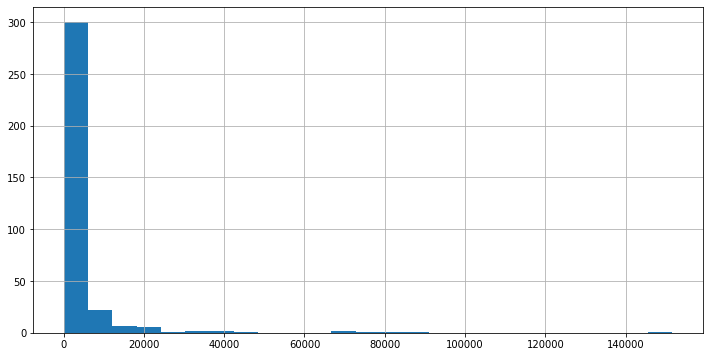

In [7]:
plt.rcParams['figure.figsize'] = (12, 6)
df['delito'].value_counts().hist(bins=25)

In [8]:
df['delito'].value_counts().describe()


count       347.000000
mean       4038.409222
std       13397.881255
min           1.000000
25%          37.500000
50%         308.000000
75%        2063.000000
max      151656.000000
Name: delito, dtype: float64

In [9]:
#Según lo anterior, vemos que existen delitos con muchas ocurrencias, como el caso del valor maximo 
#151656, pero la mediana esta apenas en 308 y variación es bastante grande


In [10]:
#Haremos dos estudios del alza y baja de los delitos para los años de inicio disponibles 
df_delitos=df[['Año_mes','delito']].value_counts().reset_index()
df_delitos.columns=['Año_mes','delito', 'count']
#Cantidad de delitos por año y mes
df_delitos=df_delitos.sort_values('Año_mes').reset_index(drop=True)
df_delitos

,Año_mes,delito,count
0,2016.1,DESAPARICION FORZADA DE PERSONAS,1
1,2016.1,DAÑO EN PROPIEDAD AJENA CULPOSA,146
2,2016.1,ROBO A PASAJERO A BORDO DE PESERO COLECTIVO SI...,1
3,2016.1,FALSIFICACION DE TITULOS AL PORTADOR Y DOCUMEN...,302
4,2016.1,HOMICIDIO CULPOSO FUERA DEL D.F (ATROPELLADO),4
...,...,...,...
12819,2022.2,CONTRA LA INTIMIDAD SEXUAL,262
12820,2022.2,ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA,1411
12821,2022.2,ROBO A NEGOCIO SIN VIOLENCIA POR FARDEROS (TIE...,733
12822,2022.2,DAÑO EN PROPIEDAD AJENA INTENCIONAL,382


In [11]:
#Con esto obtenemos la correlación de los delitos con el Año_mes y count esto porque queremos 
# saber la tendencia a crecer o decrecer de dichos delitos otra caosa que tomaremos en cuenta es la cantidad
#de delitos totales
tendencia=df_delitos.groupby('delito')[['Año_mes','count']].corr().unstack().iloc[:,1].sort_values().reset_index()
tendencia.columns=['delito', 'tendencia']
tendencia

,delito,tendencia
0,OPERACIONES CON RECURSOS DE PROCEDENCIA ILEGAL,-1.000000
1,ROBO A NEGOCIO SIN VIOLENCIA POR FARDEROS (TIE...,-0.892304
2,ROBO A NEGOCIO CON VIOLENCIA POR FARDEROS (TIE...,-0.873180
3,"PORTACIÓN, FABRICACIÓN E IMPORTACIÓN DE OBJETO...",-0.799873
4,CONTRA FUNCIONARIOS PUBLICOS,-0.787319
...,...,...
342,ROBO DE VEHICULO Y NOMINA CON VIOLENCIA,NaN
343,SECUESTRO,NaN
344,UTILIZACION INDEBIDA DE LA VIA PUBLICA,NaN
345,VIOLACION A LOS DERECHOS HUMANOS,NaN


In [12]:
delitos_totales=df['delito'].value_counts().reset_index()
delitos_totales.columns=['delito','count_t']
delitos_totales

,delito,count_t
0,VIOLENCIA FAMILIAR,151656
1,FRAUDE,90375
2,ROBO DE OBJETOS,81389
3,AMENAZAS,78163
4,ROBO A NEGOCIO SIN VIOLENCIA,68808
...,...,...
342,HOMICIDIO INTENCIONAL Y ROBO DE VEHICULO,1
343,DESACATO,1
344,ASOCIACION DELICTUOSA,1
345,CONTRA LA LEY GENERAL DE EXPLOSIVOS,1


In [13]:
#tenemos los delitos, la tendencia y la cantidad de delitos totales esto para tener una idea de cuantas ocurrencias
#se tuvo disponibles para la tendencia.
tend_delito=tendencia.merge(delitos_totales, on='delito')
#los valores en na lo que dan a entender es que no hubo variación, ese delito siempre tuvo la misma cantidad a traves del tiempo
# o es posible que aparecio en un momento determinado pero no hubo más denuncia de el.
#por lo tanto los eliminaremos ya que no hubo variación
tend_delito.dropna(subset='tendencia',inplace=True)

In [14]:
print(tend_delito.sort_values('tendencia',ascending=False)[:10]),
print('\n')
print(tend_delito.sort_values('tendencia').head(10)),


                                                delito  tendencia  count_t
312                                           ULTRAJES   1.000000        6
311                                          LENOCINIO   0.970725        4
310                         CONTRA LA INTIMIDAD SEXUAL   0.849533     2563
309                               RETENCIÓN DE MENORES   0.846673      641
308                         ROBO DE PLACA DE AUTOMOVIL   0.827554     5250
307                   ENCUBRIMIENTO POR FAVORECIMIENTO   0.819525      452
306          ROBO A NEGOCIO SIN VIOLENCIA POR FARDEROS   0.805642     1184
305                               VIOLACION EQUIPARADA   0.795125     1815
304  ROBO A TRANSEUNTE EN PARQUES Y MERCADOS CON VI...   0.785489     2700
303                                       ACOSO SEXUAL   0.782205     4361


                                              delito  tendencia  count_t
0     OPERACIONES CON RECURSOS DE PROCEDENCIA ILEGAL  -1.000000        8
1  ROBO A NEGOCIO SIN VIOLE

(None,)

Aquí podemos ver el top 10 de las tendencias positivas 
y negativas, ahora bien si vemos las tendencias y la ocurrencias totales de esos delitos,  pudieramos descartar los count_t muy bajos y decir que el top 5 de delitos que estan en alza serian:
* CONTRA LA INTIMIDAD SEXUAL,
* RETENCIÓN DE MENORES
* ROBO DE PLACA DE AUTOMOVIL
* ENCUBRIMIENTO POR FAVORECIMIENTO 
* ROBO A NEGOCIO SIN VIOLENCIA POR FARDEROS.

en el caso del top 5 d elos delitos a la baja serian:

* ROBO A NEGOCIO SIN VIOLENCIA POR FARDEROS (TIENDAS DE CONVENIENCIA)
* ROBO A NEGOCIO CON VIOLENCIA POR FARDEROS (TIENDAS DE CONVENIENCIA)
* PORTACIÓN, FABRICACIÓN E IMPORTACIÓN DE OBJETOS APTOS PARA AGREDIR
* CONTRA FUNCIONARIOS PUBLICOS
* INSOLVENCIA ALIMENTARIA


In [15]:
#solo por curiosidad mostramos las tendencias de los delitos que tuvieron mayor ocurrecia
tend_delito.sort_values('count_t',ascending=False)[:10]



,delito,tendencia,count_t
295,VIOLENCIA FAMILIAR,0.664778,151656
277,FRAUDE,0.529556,90375
66,ROBO DE OBJETOS,-0.254946,81389
289,AMENAZAS,0.617020,78163
25,ROBO A NEGOCIO SIN VIOLENCIA,-0.526025,68808
167,ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA,0.128409,67860
251,ROBO DE ACCESORIOS DE AUTO,0.421248,44976
9,DENUNCIA DE HECHOS,-0.693580,40159
173,ROBO DE OBJETOS DEL INTERIOR DE UN VEHICULO,0.148623,38538
96,ROBO DE VEHICULO DE SERVICIO PARTICULAR SIN VI...,-0.153391,34423


3. ¿Cuál es la alcaldía que más delitos tiene y cuál es la que menos?¿Por qué crees que sea
esto?

In [16]:
#Cantidad de delitos por alcaldia
cant_delitos=df['alcaldia_hechos'].value_counts().reset_index()
cant_delitos.columns=['alcaldia_hechos','count']
#Numero de delitos por alcaldias
cant_delitos

,alcaldia_hechos,count
0,CUAUHTEMOC,218016
1,IZTAPALAPA,209434
2,GUSTAVO A MADERO,141094
3,BENITO JUAREZ,114294
4,ALVARO OBREGON,94980
...,...,...
569,SAN PEDRO ATOYAC,1
570,ACONCHI,1
571,ATITALAQUIA,1
572,COMPOSTELA,1


In [17]:
#caso del maximo
#Nombre de alcaldia con más delitos, tomamos el primer elemento ya que los datos estas ordenados de mayor a menor
alcaldia_max=cant_delitos.loc[0,'alcaldia_hechos']
#Cantidad de delitos por categoria, esto para la alcaldia con más registros
#esto es para poder tener una idea de la categoia de los delitos que hubo en la alcaldia
df.loc[df['alcaldia_hechos']==alcaldia_max,'categoria_delito'].value_counts()

DELITO DE BAJO IMPACTO                                     176741
ROBO A TRANSEUNTE EN VÍA PÚBLICA CON Y SIN VIOLENCIA        12938
HECHO NO DELICTIVO                                          11591
ROBO A PASAJERO A BORDO DEL METRO CON Y SIN VIOLENCIA        5881
ROBO DE VEHÍCULO CON Y SIN VIOLENCIA                         4033
ROBO A NEGOCIO CON VIOLENCIA                                 2432
VIOLACIÓN                                                    1059
ROBO A REPARTIDOR CON Y SIN VIOLENCIA                         993
LESIONES DOLOSAS POR DISPARO DE ARMA DE FUEGO                 739
HOMICIDIO DOLOSO                                              697
ROBO A CUENTAHABIENTE SALIENDO DEL CAJERO CON VIOLENCIA       292
ROBO A PASAJERO A BORDO DE TAXI CON VIOLENCIA                 237
ROBO A CASA HABITACIÓN CON VIOLENCIA                          213
ROBO A PASAJERO A BORDO DE MICROBUS CON Y SIN VIOLENCIA       121
ROBO A TRANSPORTISTA CON Y SIN VIOLENCIA                       30
SECUESTRO 

In [18]:
#Caso del minimo
#anteriormente vimos que hay varias alcaldias con un delito, que equivale al minimo de delito
#por alcadia
#Alcaldias con un solo delito
cant_delitos.loc[cant_delitos['count']==1,'alcaldia_hechos'], len(cant_delitos)

(332    TIQUICHEO DE NICOLAS ROMERO
 333                   XOCHICOATLAN
 334                      TLALCHAPA
 335                      TETEPANGO
 336                      HOPELCHEN
                   ...             
 569               SAN PEDRO ATOYAC
 570                        ACONCHI
 571                    ATITALAQUIA
 572                     COMPOSTELA
 573                   HUATLATLAUCA
 Name: alcaldia_hechos, Length: 242, dtype: object,
 574)

In [19]:
#Resumen de estadisticos para los conteo de delitos por alcaldia
cant_delitos['count'].describe()


count       574.000000
mean       2434.081882
std       17355.553057
min           1.000000
25%           1.000000
50%           2.000000
75%           6.000000
max      218016.000000
Name: count, dtype: float64

In [20]:
#En las tablas anteriores pudimos ver que de 574 alcaldias 242 de ellas tienen un solo delito.
#y por otra parte el 75% de las alcaldias no superan los 7 delitos 
#cantidad de alcaldias con menos de 6 delitos
a=cant_delitos['count']<=6
a.sum()

438

Lo que podemos concluir aquí es que la alcaldia con más delitos fue 'CUAUHTEMOC'  pero al mayoria de esos delitos son categorizados como delitos de bajo impacto de 218016 delitos en total, 176741 son de bajo impacto, y además 11591 fueron hechos no delictivos. Por otra parte tenemos que gran cantidad de las alcadias tienen muy pocos delitos y hay 242 con la minima cantidad de delitos que es 1.

Podemos pensar que como CUAUHTEMOC es una alcaldia bastante poblada es más probable que ocurran delitos aunque la mayoria de estos sean de bajo impacto, en contra parte las alcaldias con tan pocos delitos es posible que sean sitios pequeños con pocos habitantes y además puede que esa cantidad de delitos no refleje la realidad es posible que en eas alcaldias la gente no realice las denuncias de loa delitos.

4. ¿Existe alguna tendencia estacional en la ocurrencia de delitos (mes, semana, día de la
semana, quincenas) en la CDMX?¿A qué crees que se deba?

In [21]:
#Convertimos fecha_inicio en fecha ya que la tenemos como object
df['fecha_inicio']=pd.to_datetime(df['fecha_inicio'])
#Creamos la columna nro_delitos para para poder sumar los delitos
df['nro_delitos']=np.repeat(1,len(df))
#colocamos fecha_inicio como nuevo indice de los datos
df.set_index(['fecha_inicio'],inplace=True)
df.head()

,ao_hechos,mes_hechos,fecha_hechos,ao_inicio,mes_inicio,delito,fiscalia,agencia,unidad_investigacion,categoria_delito,...,calle_hechos2,colonia_hechos,alcaldia_hechos,competencia,longitud,latitud,tempo,mes_ini_num,Año_mes,nro_delitos
fecha_inicio,,,,,,,,,,,,,,,,,,,,,
2016-02-01 00:25:44,2016.0,Enero,2016-01-31 22:16:00,2016,Febrero,DAÑO EN PROPIEDAD AJENA INTENCIONAL,INVESTIGACIÓN EN BENITO JUÁREZ,BJ-2,UI-3CD,DELITO DE BAJO IMPACTO,...,LAGO PTE.,AMÉRICAS UNIDAS,BENITO JUAREZ,NaN,-99.140215,19.380315,NaN,2,2016.2,1
2016-02-01 00:52:37,2016.0,Enero,2016-01-31 20:50:00,2016,Febrero,ROBO DE VEHICULO DE SERVICIO PARTICULAR CON VI...,INVESTIGACIÓN PARA LA ATENCIÓN DEL DELITO DE R...,ORIENTEII,UI-3CD,ROBO DE VEHÍCULO CON Y SIN VIOLENCIA,...,GRANJEROS,LOS CIPRESES,IZTAPALAPA,NaN,-99.108403,19.352859,NaN,2,2016.2,1
2016-02-01 01:33:26,2016.0,Febrero,2016-02-01 00:30:00,2016,Febrero,NARCOMENUDEO POSESION SIMPLE,"INVESTIGACIÓN PARA LA ATENCIÓN DE NIÑOS, NIÑAS...",57,UI-3CD,DELITO DE BAJO IMPACTO,...,NaN,UNIDAD VICENTE GUERRERO,IZTAPALAPA,NaN,-99.061321,19.356451,NaN,2,2016.2,1
2016-02-01 02:09:11,2016.0,Enero,2016-01-31 22:00:00,2016,Febrero,ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA,INVESTIGACIÓN EN IZTAPALAPA,IZP-6,UI-3CD,ROBO A TRANSEUNTE EN VÍA PÚBLICA CON Y SIN VIO...,...,GAVILLEROS,EMILIANO ZAPATA,IZTAPALAPA,NaN,-98.976379,19.331633,NaN,2,2016.2,1
2016-02-01 02:16:49,2015.0,Diciembre,2015-12-25 12:00:00,2016,Febrero,DENUNCIA DE HECHOS,INVESTIGACIÓN EN BENITO JUÁREZ,BJ-1,UI-3SD,HECHO NO DELICTIVO,...,AVENIDA COLONIA DEL VALLE,DEL VALLE CENTRO,BENITO JUAREZ,NaN,-99.172189,19.387114,NaN,2,2016.2,1


In [22]:
#Datos que reflejan la cantidad de delitos por dia, semana, mes, quincena
delitos_dia=df['nro_delitos'].resample('D').sum()
delitos_semana=df['nro_delitos'].resample('W').sum()
delitos_quincena=df['nro_delitos'].resample('SM').sum()
delitos_mes=df['nro_delitos'].resample('M').sum()




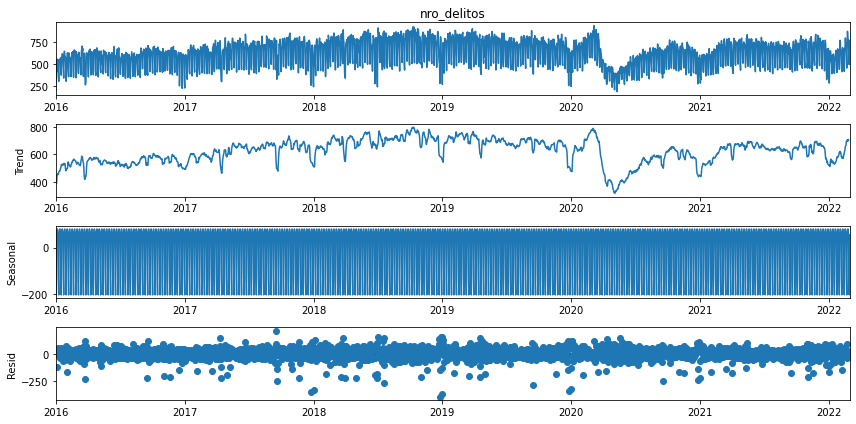

In [23]:
#Aquí tenemos la grafica del serie, la tendencia, la estacionalidad y el residuo
descomposicion = seasonal_decompose(delitos_dia,model='additive')  
descomposicion.plot()
plt.rcParams['figure.figsize'] = (20, 9)



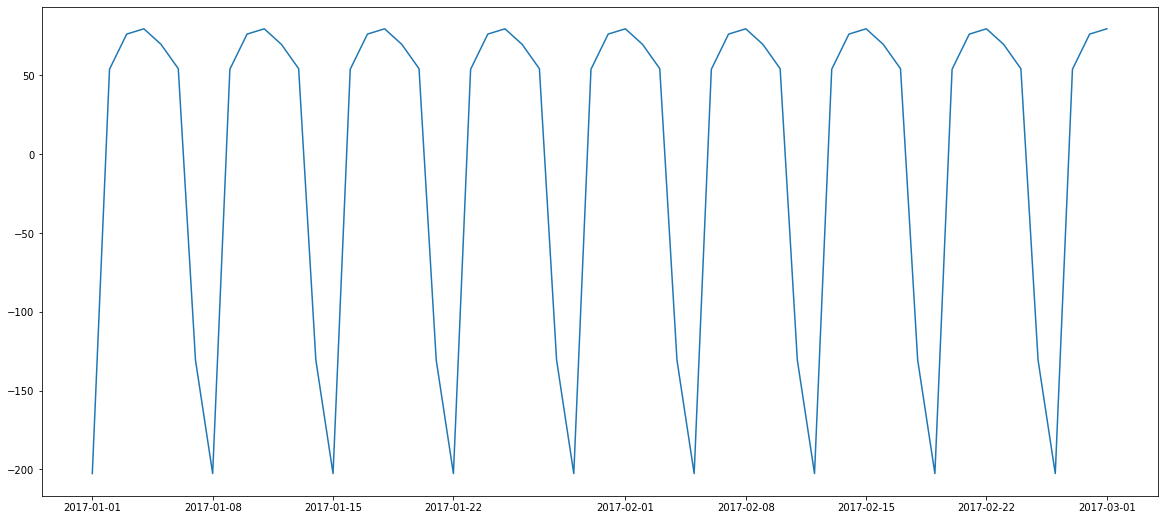

In [24]:
#Aca tomamos una cantidad limitada de fechas, para poder mejor la grafica de la estacionalidad
plt.plot(descomposicion.seasonal.loc['2017-01-01':'2017-03-01'])
plt.rcParams['figure.figsize'] = (14, 6)

In [78]:
#datos de usados para la grafica anterior
a=descomposicion.seasonal.loc['2017-01-01':'2017-03-01'].reset_index().fecha_inicio
#valores de dia de la semana
b=[int(date.strftime('%w')) for date in a]
b=pd.DataFrame(b)
#tebemos las fechas usadas para la última grafica y el dia de la semana, donde domingo es 0 y 6 es sabado
pd.DataFrame(a).join(b)

,fecha_inicio,0
0,2017-01-01,0
1,2017-01-02,1
2,2017-01-03,2
3,2017-01-04,3
4,2017-01-05,4
5,2017-01-06,5
6,2017-01-07,6
7,2017-01-08,0
8,2017-01-09,1
9,2017-01-10,2


Vemos un comportamiento ciclico cada semana, pasamos de pocos delitos subimos entre semana y luego baja en los fines de semana, esto lo podemos ver ayudados del dataframe anterior.

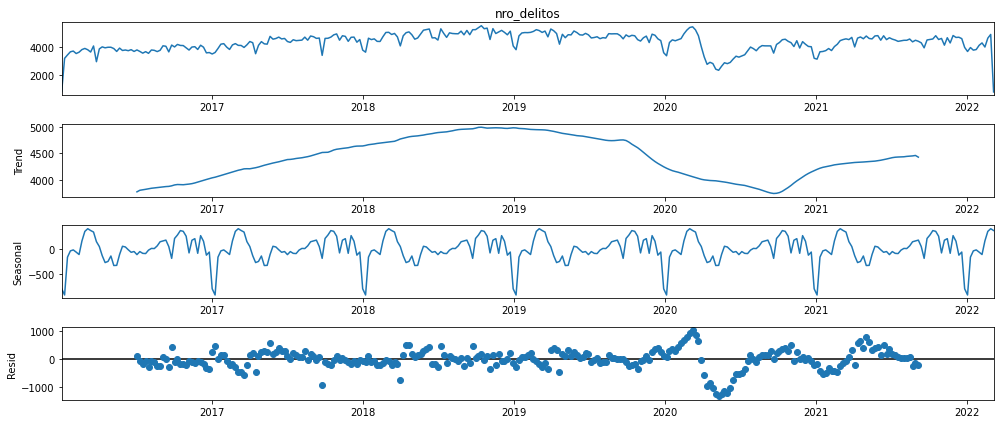

In [27]:
#Descomposición de la serie de delitos por semana
descomposicion2 = seasonal_decompose(delitos_semana,model='additive')  
fig = descomposicion2.plot()
plt.rcParams['figure.figsize'] = (14, 9)

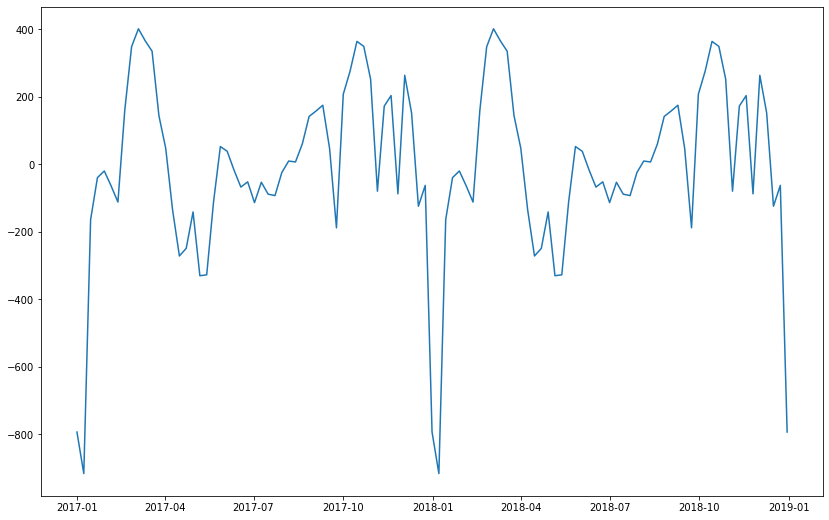

In [28]:
#para visualizarlo un poco mejor
plt.plot(descomposicion2.seasonal.loc['2017-01-01':'2019-01-01'])

Podemos ver que cerca del final de cada año hay una tendencia a la baja de delitos considerable cerca de cada fin de año y comienzo del siguiente año.

Lo picos más altos estan aproximadente en las semanas de marzo y las de noviembre.

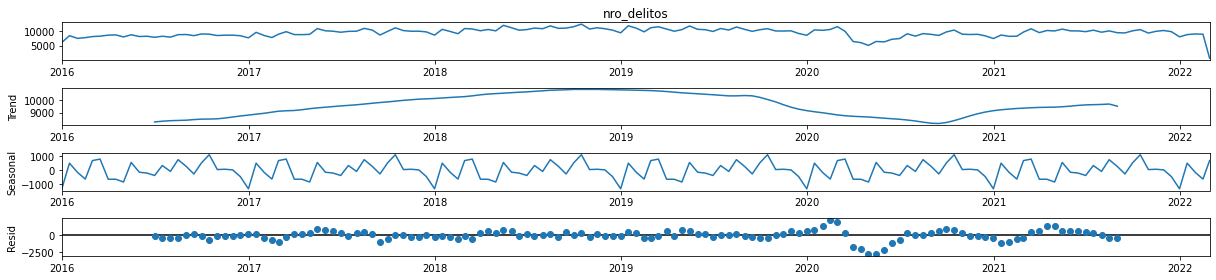

In [43]:
#Descomposición de la serie de delitos por quincena
descomposicion3 = seasonal_decompose(delitos_quincena, model='additive', period=24)  
fig = descomposicion3.plot()

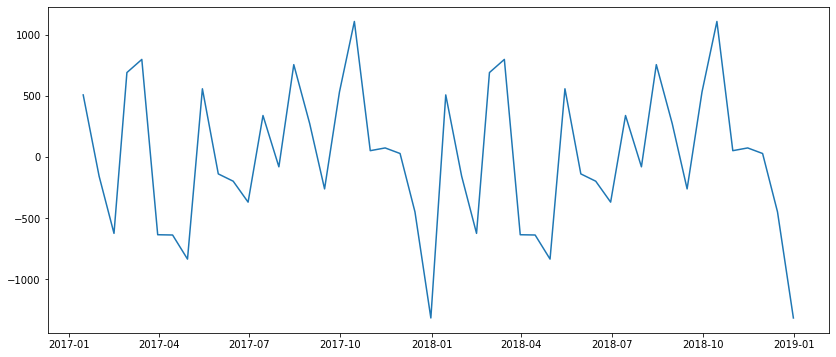

In [28]:

plt.plot(descomposicion3.seasonal.loc['2017-01-01':'2019-01-01'])
plt.rcParams['figure.figsize'] = (17, 4)

Podemos notar varios picos en cada año, tambien se ve la tendencia a la baja a final de año, como ocurria con el grafico estacionalidad de las semanas.

In [ ]:

plt.plot(descomposicion3.seasonal.loc['2017-01-01':'2019-01-01'])
plt.rcParams['figure.figsize'] = (17, 4)

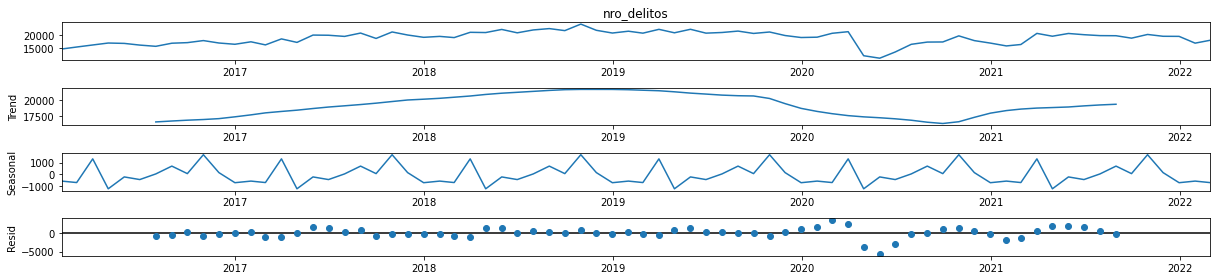

In [29]:
#Descomposición de la serie de delitos por mes
descomposicion4 = seasonal_decompose(delitos_mes, model='additive')  
fig = descomposicion4.plot()
plt.rcParams['figure.figsize'] = (14, 9)

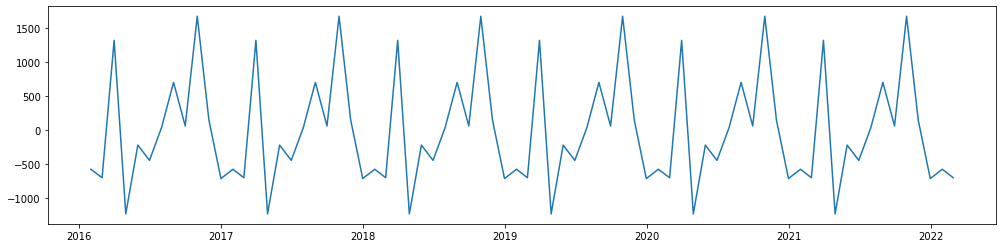

In [31]:
#Grafica de estacionalidad sola
plt.plot(descomposicion4.seasonal)
plt.rcParams['figure.figsize'] = (17, 4)

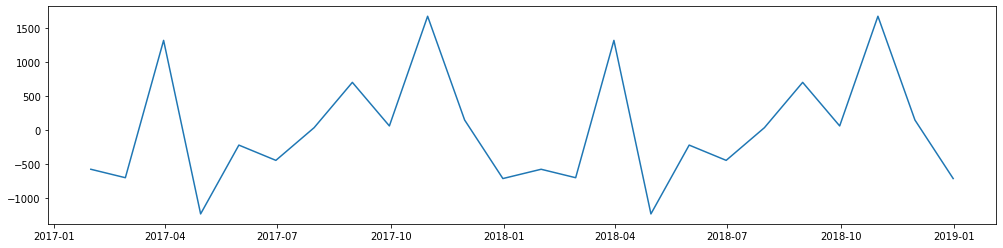

In [32]:
#Grafica de estacionalidad para 2017-2019
plt.plot(descomposicion4.seasonal.loc['2017-01-01':'2019-01-01'])
plt.rcParams['figure.figsize'] = (17, 4)

Podemos notar que el pico más bajo de los delitos ocurre en mayo aproximadamente, y entre los dos picos más altos tenemos uno en abril y otro por noviembre que va banjando a final de año.

5. ¿Cuáles son los delitos que más caracterizan a cada alcaldía? Es decir, delitos que
suceden con mayor frecuencia en una alcaldía y con menor frecuencia en las demás

In [42]:
#primero buscaremos los delitos con mayor frecuencia en la tabla delito-alcaldia y luego veremos a mas detalle si esos delitos tienen 
#menor frecuencia en alguna alcaldia
df_=df.reset_index()
df_[['delito','alcaldia_hechos']].value_counts()



delito                                                       alcaldia_hechos            
VIOLENCIA FAMILIAR                                           IZTAPALAPA                     27124
FRAUDE                                                       CUAUHTEMOC                     22509
VIOLENCIA FAMILIAR                                           GUSTAVO A MADERO               18166
ROBO DE OBJETOS                                              CUAUHTEMOC                     15547
ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA               IZTAPALAPA                     13333
                                                                                            ...  
ROBO A PASAJERO A BORDO DE TRANSPORTE PÚBLICO CON VIOLENCIA  SAN MARTIN DE LAS PIRAMIDES        1
EJERCICIO ILEGAL Y ABANDONO DEL SERVICIO PUBLICO             NEZAHUALCOYOTL                     1
                                                             MORELIA                            1
                             

In [112]:
delitos_alcaldia=df_[['delito','alcaldia_hechos']].value_counts().reset_index()
#tomamos los 100 primeros registros, de ahi obatenemos los delitos que tuvieron mayor ocurrencia por alcaldia,
# quitaremos los duplicados
top_delitos=delitos_alcaldia[:99].drop_duplicates(subset='delito').delito.values

In [117]:
val_top=delitos_alcaldia['delito'].isin(top_delitos)
delitos_top=delitos_alcaldia.loc[val_top]
#len(delitos_top.alcaldia_hechos.unique())
delitos_top.set_index('delito', inplace=True)
delitos_top

,alcaldia_hechos,0
delito,,
VIOLENCIA FAMILIAR,IZTAPALAPA,27124
FRAUDE,CUAUHTEMOC,22509
VIOLENCIA FAMILIAR,GUSTAVO A MADERO,18166
ROBO DE OBJETOS,CUAUHTEMOC,15547
ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA,IZTAPALAPA,13333
...,...,...
ROBO A PASAJERO A BORDO DE METRO SIN VIOLENCIA,CUAJIMALPA DE MORELOS,1
ROBO A PASAJERO A BORDO DE METRO SIN VIOLENCIA,LA MAGDALENA CONTRERAS,1
ROBO A PASAJERO A BORDO DE METRO SIN VIOLENCIA,LA PAZ,1


In [209]:
#Diccionario con los delitos top como llave
dict_delitos=dict([(d,{}) for d in top_delitos])
dict_delitos

{'VIOLENCIA FAMILIAR': {},
 'FRAUDE': {},
 'ROBO DE OBJETOS': {},
 'ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA': {},
 'AMENAZAS': {},
 'ROBO A NEGOCIO SIN VIOLENCIA': {},
 'ROBO DE ACCESORIOS DE AUTO': {},
 'DENUNCIA DE HECHOS': {},
 'ROBO DE VEHICULO DE SERVICIO PARTICULAR SIN VIOLENCIA': {},
 'ROBO A PASAJERO A BORDO DE METRO SIN VIOLENCIA': {},
 'ABUSO DE CONFIANZA': {},
 'NARCOMENUDEO POSESION SIMPLE': {},
 'ROBO A CASA HABITACION SIN VIOLENCIA': {},
 'ROBO DE OBJETOS DEL INTERIOR DE UN VEHICULO': {},
 'ROBO A NEGOCIO CON VIOLENCIA': {},
 'FALSIFICACION DE TITULOS AL PORTADOR Y DOCUMENTOS DE CREDITO PUBLICO': {},
 'ROBO A TRANSEUNTE DE CELULAR SIN VIOLENCIA': {},
 'ROBO DE VEHICULO DE PEDALES': {},
 'ROBO A REPARTIDOR CON VIOLENCIA': {},
 'DESPOJO': {}}

Como queremos ver las alcaldias con varios delitos y en contra parte con otras en las cuales dichos delitos tengan
menos ocurrencias, de cada delito tomaremos tomaremos las 5 alcaldias con más ocurrencias de ese delitos y las 5 con menos ocurrencias, luego de esto se creara una dataframe donde se vean reflejadas esas ocurrencia.


In [210]:

for d in top_delitos:
    #tomamos las 5 primeras alcaldias con mayor cantidad de delitos
    # y la que tiene menor cantidad y lo guardamos en una lista,
    #para el delito de turno 'd'
    alcaldias_top=delitos_top.loc[d,'alcaldia_hechos'].iloc[:5].tolist()
    alcaldias_bottom=delitos_top.loc[d,'alcaldia_hechos'].iloc[-5:].tolist()
    alcaldias_join=alcaldias_top + alcaldias_bottom


    #tomamos las 5 primeras filas de conteo más altas y las bajas
    # lo guardamos en una lista,
    conteo_top=delitos_top.loc[d,0].iloc[:5].tolist()
    conteo_bottom=delitos_top.loc[d,0].iloc[-5:].tolist()
    conteo_join=conteo_top + conteo_bottom


    for i in range(10):
        #Llenamos el diccionaria que liuego usaremos para craer un dataframe
        #con las ocurrecias de las alcaldias y delitos
        dict_delitos[d][alcaldias_join[i]]=conteo_join[i]
    
    

In [218]:
m=pd.DataFrame(dict_delitos)
#Cambiaremos los na por cero, ya que esos na dicen que hay alcaldias que no tienen ciertos delitos
m.fillna(0, inplace=True)
#matriz de ocurrencias
m.T


,IZTAPALAPA,GUSTAVO A MADERO,CUAUHTEMOC,ALVARO OBREGON,TLALPAN,BUCTZOTZ,CADEREYTA DE MONTES,CALIMAYA,CALNALI,CARMEN,...,TEXCOCO,TULTITLAN,ZITACUARO,ZIHUATANEJO DE AZUETA,ECATEPEC DE MORELOS,XOCHIMILCO,TEHUACAN,ZAPOTITLAN PALMAS,COACALCO DE BERRIOZABAL,CHALCO
VIOLENCIA FAMILIAR,27124.0,18166.0,12133.0,11345.0,10978.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
FRAUDE,7526.0,6491.0,22509.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ROBO DE OBJETOS,10570.0,0.0,15547.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA,13333.0,6927.0,10230.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AMENAZAS,12296.0,8091.0,9965.0,5717.0,5509.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ROBO A NEGOCIO SIN VIOLENCIA,10597.0,7152.0,11102.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ROBO DE ACCESORIOS DE AUTO,3639.0,4316.0,8206.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
DENUNCIA DE HECHOS,5534.0,3708.0,8559.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ROBO DE VEHICULO DE SERVICIO PARTICULAR SIN VIOLENCIA,5966.0,4498.0,0.0,0.0,2518.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ROBO A PASAJERO A BORDO DE METRO SIN VIOLENCIA,0.0,0.0,5474.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


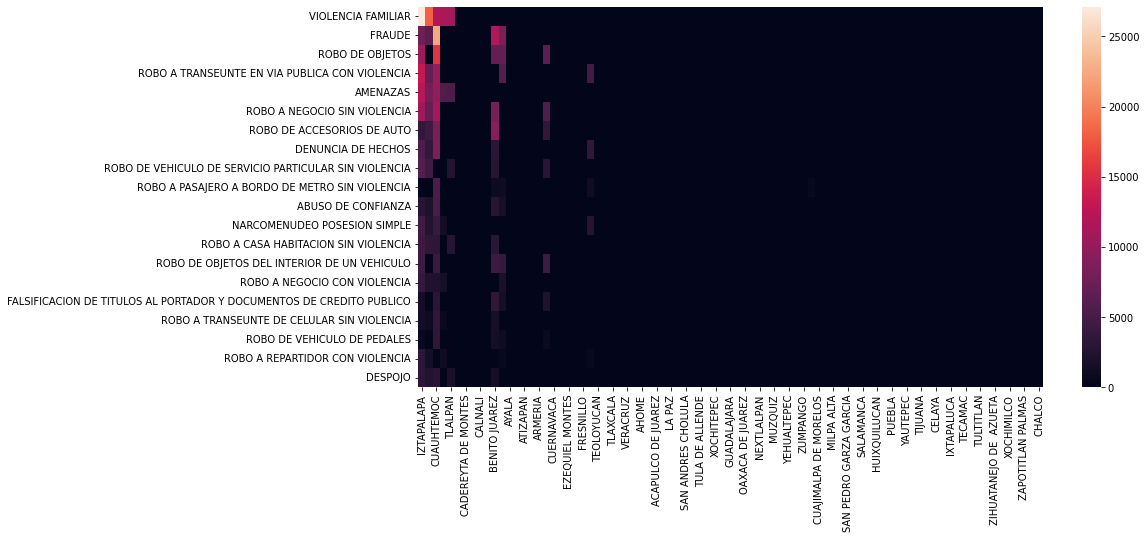

In [219]:
#mapa de calor con los delitos y al alcaldias aqui podemos ver que alcaldias tienen varias ocurrencias ´para un delito
ax = sns.heatmap(m.T)